# Coding Block 4 - Afternoon

## Optimizing Decision Tree Performance

What are criteria we want to optimize the code for?

- **criterion :  optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.  Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.


### Load the packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
'''
...
'''

'\n...\n'

### Read the dataset 

In [8]:
df = pd.read_csv("../data/df_imputed_clean.csv")
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Kopie des Datensatzes ohne die Zielvariable (falls vorhanden)
X = df.drop(columns=['Outcome', 'Multivariate_Outlier', 'Mahalanobis_Distance', 'Unnamed: 0'], errors='ignore')  # Falls 'target' existiert, wird sie entfernt

# Wähle eine der beiden Methoden:

# 1️⃣ Min-Max-Skalierung (Werte zwischen 0 und 1)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


# Umwandlung in ein DataFrame mit Spaltennamen beibehalten
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Falls die Zielvariable existiert, hänge sie wieder an
if 'Outcome' in df.columns:
    df_normalized['Outcome'] = df['Outcome']

# Anzeige der normalisierten Daten
df_normalized.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outlier,Outcome
0,0.352941,0.670968,0.489796,0.528302,0.290566,0.314928,0.302479,0.483333,0.0,1.0
1,0.058824,0.264516,0.428571,0.415094,0.082264,0.171779,0.150413,0.166667,0.0,0.0
2,0.470588,0.896774,0.408163,0.354717,0.282264,0.104294,0.327273,0.183333,0.0,1.0
3,0.058824,0.290323,0.428571,0.301887,0.149057,0.202454,0.049036,0.000000,0.0,0.0
4,0.294118,0.464516,0.510204,0.256604,0.165660,0.151329,0.067769,0.150000,0.0,0.0


## Do some hyperparameter tuning to benchmark different decision tree models

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Test Accuracy of Best Model: 0.7877


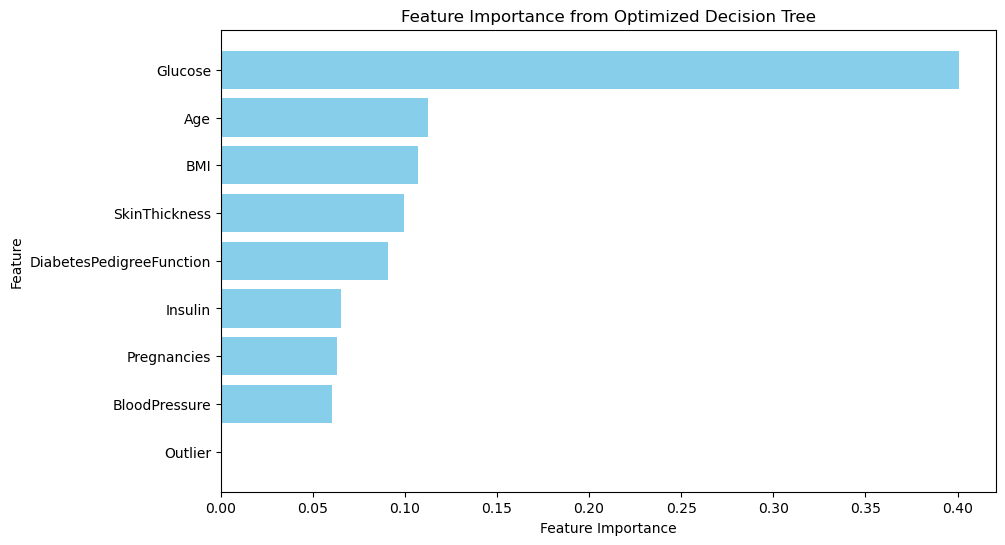

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score


# 1️⃣ Load Data
X = df_normalized.drop(columns=['Outcome'], errors='ignore')  # Features
y = df_normalized['Outcome']  # Target variable

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Define Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# 3️⃣ Define Hyperparameter Grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Attribute selection measure
    'splitter': ['best', 'random'],  # Split strategy
    'max_depth': [3, 5, 10, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5]  # Minimum samples in a leaf node
}

# 4️⃣ Grid Search for Hyperparameter Optimization
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 5️⃣ Get Best Model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# 6️⃣ Evaluate Model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

# 7️⃣ Feature Importance Plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Optimized Decision Tree')
plt.gca().invert_yaxis()
plt.show()


## Use the information of the decision tree classifier to produce simple plots and information for stakeholders.
What are some relevant patterns to predict diabetes?

🔑 Key Findings
Glucose is the strongest predictor

A higher glucose level significantly increases the likelihood of diabetes.
Patients with high glucose readings should be prioritized for further testing.
Age and BMI also play a major role

Older individuals are more likely to develop diabetes.
Higher BMI (obesity) is strongly linked to diabetes risk.
Skin Thickness & Diabetes Pedigree Function contribute

Skin Thickness (a measure of body fat) is associated with diabetes risk.
Diabetes Pedigree Function indicates genetic predisposition—patients with a family history have higher chances.
Other factors like Insulin, Pregnancies & Blood Pressure matter

Insulin resistance is an indicator of diabetes.
Pregnancies can impact diabetes risk, especially in gestational diabetes cases.
Blood Pressure has some influence but is less significant than glucose, age, and BMI.
Outliers may affect model performance

The presence of an "Outlier" feature suggests some data anomalies—this should be investigated.


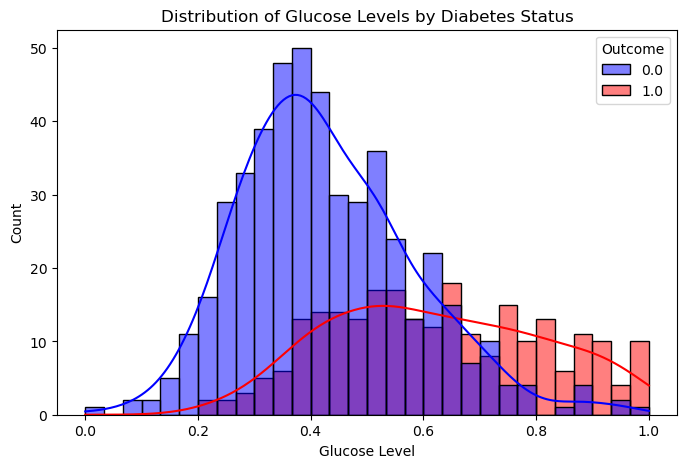

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_normalized, x="Glucose", hue="Outcome", bins=30, kde=True, palette=["blue", "red"])
plt.title("Distribution of Glucose Levels by Diabetes Status")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()


/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_3914/1573396522.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




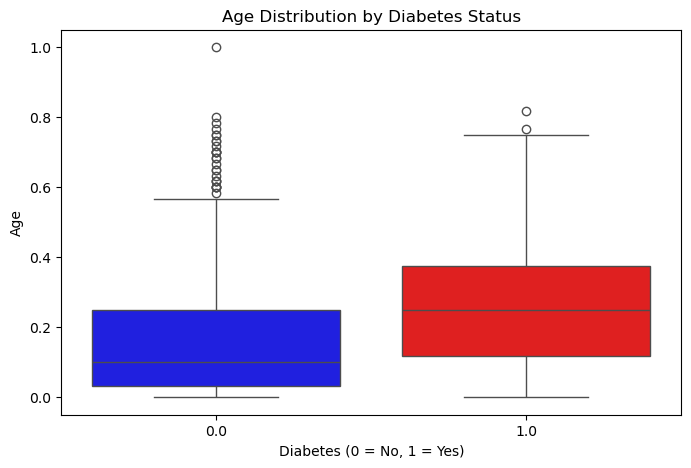

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="Age", data=df_normalized, palette=["blue", "red"])
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_3914/3980374701.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_3914/3980374701.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




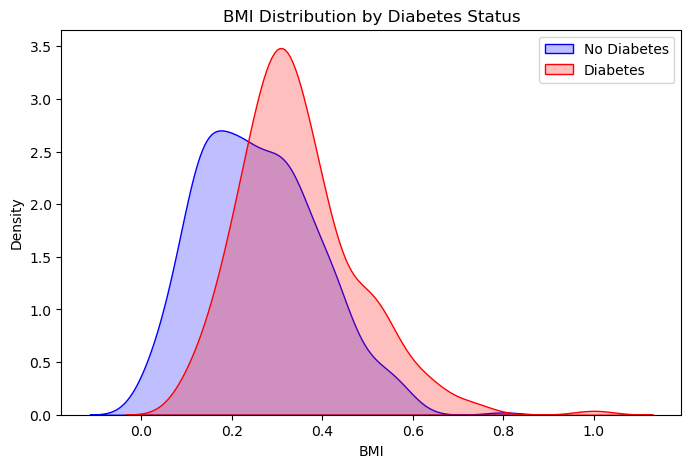

In [14]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_normalized[df_normalized["Outcome"] == 0]["BMI"], label="No Diabetes", shade=True, color="blue")
sns.kdeplot(df_normalized[df_normalized["Outcome"] == 1]["BMI"], label="Diabetes", shade=True, color="red")
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()
